### Bibliotecas

In [2]:
# Instalação manual de bibliotecas
!pip install numpy matplotlib pandas seaborn prettytable
# Bibliotecas


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
import prettytable as pt


# 1) Considere a base de dados Breast Cancer Wisconsin (Diagnostic) (baixar em http://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic). Remova a coluna ID da base de dados e separe a coluna de Diagnosis. Divida a base de dados: 70% das primeiras amostras serão o conjunto de treinamento e os restantes 30% serão usados para teste. Faça:



### Leitura inicial e considerações gerais:

In [3]:
# Leitura Inicial
# data_raw = pd.read_csv('wdbc.data', header = None, names=feature_names)
data_raw = pd.read_csv('wdbc.data', header = None)
data_raw.head()


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


O conjunto de dados é dividido em 3 faixas:
- 2 - 11: médio (da imagem)
- 12 - 21: desvio padrão (da imagem)
- 22 - 31: pior valor (da imagem)

Observe que a coluna 1 é a saída (diagnóstico), e a coluna 0 é um número de identificação irrelevante, que será removido dos dados.
Como não conhecemos a priori a influência do desvio padrão da imagem e do pior valor do atributo no diagnóstico, não iremos segmentar os dados.
Em vez disso, trataremos todos os 30 atributos como se fossem atributos comuns.

### Removemos a coluna de ID do conjunto de dados, pois ele não é relevante

In [4]:
# Removendo atributo irrelevante
data_slice_no_id = data_raw.loc[:,1:31]
data_slice_no_id.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Renomeamos a primeira coluna para 'class'. Ela contém a saída, ou seja, o diagnóstico:

In [5]:
# Renomeia algumas colunas
data = data_slice_no_id.rename({1:'class'}, axis=1)
data
# print(data[4].var())

,class,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
data.describe()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Por último, separamos os dados entre treinamento e teste:

In [7]:
# 70% para treino
train_index = int(0.7*data.shape[0])

print(f"Amostras de treino: [0,{train_index}[")
data_train = data.iloc[0:train_index,:]

# restante (30%) para teste
print(f"Amostras de teste: [{train_index},{data.shape[0]}[")
data_test = data.iloc[train_index:data.shape[0],:]
# print(data_test)

Amostras de treino: [0,398[
Amostras de teste: [398,569[


# a) Com os dados de treinamento, calcule os valores de média e desvio padrão de cada atributo para cada classe. Organize os valores em uma tabela. Comente os valores observados.







In [8]:
# Definimos o cabeçalho das tabelas:

mean_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']
se_names = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se']
edge_names = ['radius_edge', 'texture_edge', 'perimeter_edge', 'area_edge', 'smoothness_edge', 'compactness_edge', 'concavity_edge', 'concave_points_edge', 'symmetry_edge', 'fractal_dimension_edge']
mean_names.extend(se_names)
mean_names.extend(edge_names)
feature_names = ['class']
feature_names.extend(mean_names)

# define faixa dos dados que são os atributos (exclui a classe)
faixa = np.arange(1,31)

# Extrai todos os valores únicos de classe e os coloca num vetor
classes = data_train['class'].unique()

# cria tabelas
tabela1 = pt.PrettyTable()
tabela2 = pt.PrettyTable()

# Adiciona cabeçalho às tabelas:
tabela1.field_names = feature_names
tabela2.field_names = feature_names

# Imprime a tabela de média
print(f"Média de cada classe:\n")
for i in range(0,classes.size):
    data_select = data_train[data_train['class'] == classes[i]]

    # Calcula média
    data_slice = data_select.iloc[:,faixa].mean()
    data_slice = data_slice.round(4)
    
    # Formata dados em linha da tabela
    row = list(classes[i])
    row.extend(data_slice)
    # Adciiona linha à tabela
    tabela1.add_row(list(row))
print(tabela1)

print('\n')

# Imprime a tabela de variância:
print(f"Variância de cada classe:")
for i in range(0,classes.size):
    data_select = data_train[data_train['class'] == classes[i]]

    # Calcula média e arredonda para 4 casas decimais 
    data_slice = data_select.iloc[:,faixa].var()
    data_slice = data_slice.round(6)
    
    # Formata dados em linha da tabela
    row = list(classes[i])
    row.extend(data_slice)
    # Adciiona linha à tabela
    tabela2.add_row(list(row))
print(tabela2)


Média de cada classe:

+-------+-------------+--------------+----------------+-----------+-----------------+------------------+----------------+---------------------+---------------+------------------------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+-------------+--------------+----------------+-----------+-----------------+------------------+----------------+---------------------+---------------+------------------------+
| class | radius_mean | texture_mean | perimeter_mean | area_mean | smoothness_mean | compactness_mean | concavity_mean | concave_points_mean | symmetry_mean | fractal_dimension_mean | radius_se | texture_se | perimeter_se | area_se | smoothness_se | compactness_se | concavity_se | concave_points_se | symmetry_se | fractal_dimension_se | radius_edge | texture_edge | perimeter_edge | area_edge | smoothness_edge | compactness_edge | concavity_edge | concave_po

- Comparando os valores de médias e variâncias com os dados, pode-se observar que para os atributos 'perimeter_mean' e 'area_mean', a variância superior à média, por um fator de 4 vezes e 1000 vezes respectivamente para amostras Malignas, e cerca de 2 vezes e 40 vezes respectivamente para amostras Benignas. 
- Em geral, os valores médios dos atributos de amostras Malignas são *um pouco maiores* do que os de amostras Benignas, tanto média quanto variância. As exceções são 'fractal_dimension_mean', 'texture_se' e 'symmetry_se', onde os valores das amostras Malignas são muito próximos ou menores que os das amostras Benignas. 
- A variância dos valores dos atributos de amostras Malignas são em geral *um pouco maiores* que o de amostras benignas, com exceção de 'texture_mean', 'smoothness_mean', 'texture_se', 'smoothness_se', 'concavity_se', 'concave_points_se', 'fractal_dimension_se', 'texture_edge' e 'smoothness_edge', em que os valores são próximos ou menores.

- Os dados de média foram arredondados para 4 casas decimais (tal qual foram fornecidos os dados de entrada). A variância foi colocada em 6 casas decimais, pois alguins valores eram demasiado pequenos em magnitude.

# b) Visualize os dados de treinamento usando o t-SNE (pode usar o código pronto). Comente o gráfico obtido.

In [9]:
import pylab
from tsne import *


print("Run Y = tsne.tsne(X, no_dims, perplexity) to perform t-SNE on your dataset.")

# Separa apenas os dados que são atributos
faixa = np.arange(1,31)
# print(data_train)
# print(faixa)
# print(data_train.iloc[:,faixa])
# Coloca dados de entrada sem a coluna de classes
X = data_train.iloc[:,faixa].to_numpy()
print(X.shape[1])
n_collumns = X.shape[1]


Y = tsne(X, no_dims=2, perplexity=50.0)
# Y = tsne(X, no_dims=2, initial_dims=50, perplexity=200.0)
# Y = tsne(X, n_collumns, 20.0)
print(Y)

Run Y = tsne.tsne(X, no_dims, perplexity) to perform t-SNE on your dataset.
30
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 398...


/home/harmonia/codes/machine-learning-laboratory-2023-2/lista/tsne.py:28: RuntimeWarning: divide by zero encountered in log
  H = np.log(sumP) + beta * np.sum(D * P) / sumP
/home/harmonia/codes/machine-learning-laboratory-2023-2/lista/tsne.py:28: RuntimeWarning: invalid value encountered in divide
  H = np.log(sumP) + beta * np.sum(D * P) / sumP
/home/harmonia/codes/machine-learning-laboratory-2023-2/lista/tsne.py:29: RuntimeWarning: divide by zero encountered in divide
  P = P / sumP
/home/harmonia/codes/machine-learning-laboratory-2023-2/lista/tsne.py:29: RuntimeWarning: invalid value encountered in divide
  P = P / sumP
/home/harmonia/codes/machine-learning-laboratory-2023-2/lista/tsne.py:29: RuntimeWarning: overflow encountered in divide
  P = P / sumP


Mean value of sigma: 47.845638
Iteration 10: error is nan
Iteration 20: error is nan
Iteration 30: error is nan
Iteration 40: error is nan
Iteration 50: error is nan
Iteration 60: error is nan
Iteration 70: error is nan
Iteration 80: error is nan
Iteration 90: error is nan
Iteration 100: error is nan
Iteration 110: error is nan
Iteration 120: error is nan
Iteration 130: error is nan
Iteration 140: error is nan
Iteration 150: error is nan
Iteration 160: error is nan
Iteration 170: error is nan
Iteration 180: error is nan
Iteration 190: error is nan
Iteration 200: error is nan
Iteration 210: error is nan
Iteration 220: error is nan
Iteration 230: error is nan
Iteration 240: error is nan
Iteration 250: error is nan
Iteration 260: error is nan
Iteration 270: error is nan
Iteration 280: error is nan
Iteration 290: error is nan
Iteration 300: error is nan
Iteration 310: error is nan
Iteration 320: error is nan
Iteration 330: error is nan
Iteration 340: error is nan
Iteration 350: error is na

A tentativa de executar o T-SNE com a biblioteca acima não foi bem sucedida.
A titulo de confirmação, tentaremos com outra biblioteca. Se o problema persistir, significa que há algo errado nos dados. Se o problema desaparecer, há alguma incompatibilidade (a biblitoeca foi testada apenas com python 2.7.10, enquanto o python que estamos utilizando é o 3.10.12) ou erro no uso da biblioteca.
Testaremos agora com a implementação do TSNE disponível na biblioteca SciKit Learn:

In [10]:
from sklearn.manifold import TSNE

# Separa apenas os dados que são atributos
faixa = np.arange(1,31)

# Coloca dados de entrada sem a coluna de classes
X = data_train.iloc[:,faixa].to_numpy()
n_collumns = X.shape[1]


Y = TSNE(n_components=2, perplexity=20.0).fit_transform(X)
print(Y)

[[ 5.01776962e+01 -6.91848326e+00]
 [ 4.84977150e+01 -9.65362072e+00]
 [ 4.40046005e+01 -6.02678585e+00]
 [-2.48780365e+01 -1.39590540e+01]
 [ 4.16092072e+01 -7.06767368e+00]
 [ 2.57997036e+00  3.56144190e+00]
 [ 4.13939171e+01 -2.21922398e+00]
 [ 1.31003199e+01  7.33906412e+00]
 [ 2.88062143e+00  4.92519093e+00]
 [ 1.79365933e+00  3.05182886e+00]
 [ 2.68093796e+01  6.40877724e+00]
 [ 3.10509548e+01  6.55867863e+00]
 [ 3.49885826e+01 -1.20300376e+00]
 [ 1.88977261e+01  1.26730871e+01]
 [ 2.37801939e-01  9.01313972e+00]
 [ 1.75756111e+01  9.12296963e+00]
 [ 2.36085491e+01  6.31227732e+00]
 [ 3.14508553e+01  6.14802551e+00]
 [ 5.23898582e+01 -1.01127720e+01]
 [ 1.25319755e+00  7.82318544e+00]
 [-7.80356026e+00 -1.98836374e+00]
 [-5.32289581e+01  8.74827683e-01]
 [ 1.99082565e+01  9.05067539e+00]
 [ 5.33431625e+01 -1.11498022e+01]
 [ 5.11758003e+01 -7.23114061e+00]
 [ 3.62511749e+01  2.29464364e+00]
 [ 1.51533184e+01  9.80869675e+00]
 [ 3.60452576e+01 -1.25757277e+00]
 [ 3.04614716e+01  7

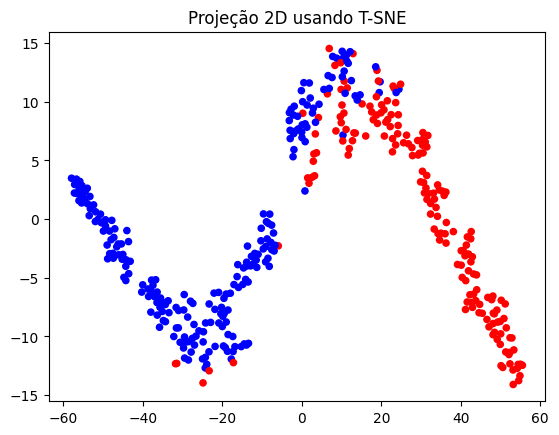

In [11]:
fig, ax = plt.subplots()

# Define cores para os gráficos
colors = []
for i in list(data_train.iloc[:,0]):
    if(i == 'M'): colors.append('red')
    else: colors.append('blue')

# Plota os gráficos
scatter = plt.scatter(Y[:, 0], Y[:, 1], 20, colors)

# Produz legenda com cores únicas a partir do scatterplot
# legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Diagnóstico")
plt.title("Projeção 2D usando T-SNE")

plt.show()

Observe que os pontos em vermelho correspondem a amostras Malignas, enquanto os em azul correspondem às amostras Benignas.
- As classes formam dois grupos aproximadamente separados. Uma boa porção das amostras de ambas as classes se encontra separada em região bem definida. 
- Há uma região de mistura entre as duas, indicando que haverão alguns casos em que será mais difícil realizar a classificação.
- Existem outliers M em regiões B no terceiro quadrante, o que terá de ser investigado mais à frente.
- No geral, o gráfico indica boas perspectivas de se realizar uma classificação com bom grau de sucesso. 

# c) Com os dados de treinamento, use o coeficiente de correlação para remover atributos redundantes (considere atributos redundantes atributos com coeficiente maior ou igual a 0,9).

Primeiro calculamos o coeficiente de correlação entre todas as entradas. O item (i,j) da matriz representa o coeficiente de correlação entre o atributo i e o atributo j. Se esse coeficiente for maior ou igual a 0,9, os dois atributos são redundantes.

In [12]:
# Calculamos os coeficientes de correlação
coef_corr = data_train.iloc[:,faixa].corr()
print(coef_corr)


          2         3         4         5         6         7         8   \
2   1.000000  0.415609  0.997737  0.988766  0.160886  0.500225  0.649977   
3   0.415609  1.000000  0.422929  0.401989  0.071166  0.328741  0.368553   
4   0.997737  0.422929  1.000000  0.987463  0.199727  0.552910  0.691148   
5   0.988766  0.401989  0.987463  1.000000  0.168564  0.490899  0.657970   
6   0.160886  0.071166  0.199727  0.168564  1.000000  0.654099  0.548144   
7   0.500225  0.328741  0.552910  0.490899  0.654099  1.000000  0.889950   
8   0.649977  0.368553  0.691148  0.657970  0.548144  0.889950  1.000000   
9   0.811623  0.385932  0.842107  0.810530  0.566876  0.838312  0.916711   
10  0.151857  0.118908  0.189505  0.149465  0.563773  0.626799  0.531745   
11 -0.315248 -0.035781 -0.262710 -0.287854  0.567698  0.567170  0.385138   
12  0.682642  0.309639  0.696788  0.723293  0.325906  0.519481  0.641762   
13 -0.053314  0.312538 -0.038346 -0.024622  0.131137  0.116818  0.142943   
14  0.678199

Evidenciamos na matriz apenas as combinações redundantes. Observe que a diagonal principal deve ser desprezada, pois um atributo sempre é redundante em relação a ele mesmo. Observe também que a matriz é simétrica.

In [13]:
print(coef_corr[coef_corr.abs() >= 0.9])

          2         3         4         5    6    7         8         9    10  \
2   1.000000       NaN  0.997737  0.988766  NaN  NaN       NaN       NaN  NaN   
3        NaN  1.000000       NaN       NaN  NaN  NaN       NaN       NaN  NaN   
4   0.997737       NaN  1.000000  0.987463  NaN  NaN       NaN       NaN  NaN   
5   0.988766       NaN  0.987463  1.000000  NaN  NaN       NaN       NaN  NaN   
6        NaN       NaN       NaN       NaN  1.0  NaN       NaN       NaN  NaN   
7        NaN       NaN       NaN       NaN  NaN  1.0       NaN       NaN  NaN   
8        NaN       NaN       NaN       NaN  NaN  NaN  1.000000  0.916711  NaN   
9        NaN       NaN       NaN       NaN  NaN  NaN  0.916711  1.000000  NaN   
10       NaN       NaN       NaN       NaN  NaN  NaN       NaN       NaN  1.0   
11       NaN       NaN       NaN       NaN  NaN  NaN       NaN       NaN  NaN   
12       NaN       NaN       NaN       NaN  NaN  NaN       NaN       NaN  NaN   
13       NaN       NaN      

A partir desses dados, quais atributos remover? Sabemos por exemplo que os atributo 2 e 4 são relevantes entre si. De fato, o atributo 2 é redundante em relação aos atributos 4, 5, 22, 24 e 25.  A consideração feita foi: Se um atributo i é redundante em relação a outros N atributos, então todos esses N atributos podem ser removidos, mantendo apenas o atributo i.

Dessa forma, escolhemos observar os atributos da esquerda para a direita, e para cada um deles remover os atributos redundantes em relação a ele. É preciso cuidado com a remoção mútua, por exemplo, ao olhar a "lista de redundâncias" do atributo 2 e remover o atributo 4, não deve-se mais tarde remover o atributo 2 por ele aparecer na lista de redundâncias do atributo 4.

Isso foi feito tomando-se apenas a parte triangular inferior da matriz de correlação, de forma que cada redundância é marcada apenas uma vez. também desconsiderou-se a diagonal principal.


In [14]:
redundance_matrix = coef_corr.where(np.tril(np.ones(coef_corr.shape), k=0).astype(bool))[(coef_corr.abs() >= 0.9) & (coef_corr != 1)]

# Criamos uma lista de colunas a serem excluídas:
redundance_index = []
for i in redundance_matrix.index:
    for j in redundance_matrix.columns:
        if(not(pd.isna(redundance_matrix[i][j]))): redundance_index.append(j)
# Removemos duplicatas da lista
redundance_index = list(dict.fromkeys(redundance_index))
# Ordena por ordem crescente
redundance_index.sort()
print("Índices das colunas redundantes:",redundance_index)


Índices das colunas redundantes: [4, 5, 9, 14, 15, 22, 23, 24, 25, 29]


As colunas acima correspondem aos atributos que serão removidos do dataset.

In [15]:
# Calcula índices de colunas a serem mantidas no dataset:

index = data_train.columns
# print(index)
non_redundance_index = []
# print(redundance_index)
for i in index:
    if i not in redundance_index:
        non_redundance_index.append(i)   
print("Colunas a serem mantidas no dataset:",non_redundance_index)
data_train_non_redundant = data_train[non_redundance_index]
print("\nO Dataset sem os dados redundantes:\n", data_train_non_redundant)

Colunas a serem mantidas no dataset: ['class', 2, 3, 6, 7, 8, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 26, 27, 28, 30, 31]

O Dataset sem os dados redundantes:
     class      2      3        6        7        8      10       11      12  \
0       M  17.99  10.38  0.11840  0.27760  0.30010  0.2419  0.07871  1.0950   
1       M  20.57  17.77  0.08474  0.07864  0.08690  0.1812  0.05667  0.5435   
2       M  19.69  21.25  0.10960  0.15990  0.19740  0.2069  0.05999  0.7456   
3       M  11.42  20.38  0.14250  0.28390  0.24140  0.2597  0.09744  0.4956   
4       M  20.29  14.34  0.10030  0.13280  0.19800  0.1809  0.05883  0.7572   
..    ...    ...    ...      ...      ...      ...     ...      ...     ...   
393     M  21.61  22.28  0.11670  0.20870  0.28100  0.2162  0.06606  0.6242   
394     B  12.10  17.72  0.10290  0.09758  0.04783  0.1937  0.06161  0.2841   
395     B  14.06  17.18  0.08045  0.05361  0.02681  0.1641  0.05764  0.1504   
396     B  13.51  18.89  0.10590  0.11470  0.08580

# d) Com os dados de treinamento, use informação mútua entre os atributos restantes de entrada e o atributo de saída e selecione os 10 melhores atributos.

Calculamos a informação mútua por meio das funções abaixo, que implementam as equações:

- Cálculo da informação mútua:


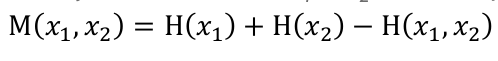

- Cálculo da entropia:


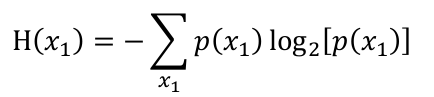

In [71]:
# Função que calcula probabilidade de um ou mais atributos dentro de um dataset
#   data: dataset
#   atribute: a lista de (um ou dois) atributos cuja probabilidade será calculada
# retorna: um float correspondente à probabilidade requerida
def probabilidade(data, atributes):
    probability_vector = data.value_counts(subset=atributes, normalize=True)
    return probability_vector

# Função que calcula entropia de um ou mais atributos dentro de um dataset
#   data: dataset
#   atribute: a lista de (um ou mais) atributos cuja entropia será calculada
# retorna: valor resultante do cálculo
def entropy(data, atributes):
    probability_vector = probabilidade(data, atributes)
    sum_elements = probability_vector.apply(lambda x: -x*math.log2(x))
    entropy_result = sum_elements.sum()
    return entropy_result

# Função que calcula informação mútua entre DOIS atributos dentro de um dataset
#   data: dataset
#   x: primeiro atributo
#   y: segundo atributo
# retorna: valor resultante do cálculo
def mutual_information(data, two_attributes):
    if len(two_attributes) != 2:
        print(f"FATAL ERROR: mutual_information -> len(two_attributes) = {len(two_attributes)}\n You are probably trying to calculate mutual information of more than 2 variables simultaneously\nTHIS IS NOT YET SUPPORTED")
    return entropy(data, two_attributes[0]) + entropy(data, two_attributes[1]) - entropy(data, two_attributes) 

def mutual_information_normalized(data, two_attributes):
    not_normalized_value = mutual_information(data, two_attributes)
    normalized_value = math.sqrt((not_normalized_value**2)/(entropy(data, two_attributes[0]) * entropy(data, two_attributes[1])))
    return normalized_value


Usando as funções acima, calculamos a informação mútua de cada um dos atributos com a saída. Colocamos esses valores numa lista e selecionamos os dez maiores valores. Esses serão os dez melhores atributos.

In [84]:
# Cria vetor de índices apenas dos atributos:
feature_index = non_redundance_index[1:len(non_redundance_index)]

# Calcula informação mútua entre a saída e cada um dos atributos, e adiciona numa lista
mutual_information_list = []
features_mutual_index = []

for i in feature_index:
    mutual_information_list.append(mutual_information_normalized(data_train[non_redundance_index], ['class',i]))
    features_mutual_index.append(i)

mutual_information_df = pd.DataFrame(mutual_information_list, index=features_mutual_index)
print(mutual_information_df)

best_features_index = mutual_information_df.nlargest(10,0).index
print(best_features_index)

           0
2   0.319757
3   0.318712
6   0.293935
7   0.327130
8   0.335040
10  0.288557
11  0.312456
12  0.335088
13  0.316170
16  0.332641
17  0.334075
18  0.330334
19  0.315571
20  0.299935
21  0.327554
26  0.280400
27  0.330167
28  0.334745
30  0.313135
31  0.326018
Index([12, 8, 28, 17, 16, 18, 27, 21, 7, 31], dtype='int64')


Temos então os dados, com apenas as colunas selecionadas:

In [85]:
data_train[best_features_index]

,12,8,28,17,16,18,27,21,7,31
0,1.0950,0.30010,0.7119,0.04904,0.006399,0.05373,0.6656,0.006193,0.27760,0.11890
1,0.5435,0.08690,0.2416,0.01308,0.005225,0.01860,0.1866,0.003532,0.07864,0.08902
2,0.7456,0.19740,0.4504,0.04006,0.006150,0.03832,0.4245,0.004571,0.15990,0.08758
3,0.4956,0.24140,0.6869,0.07458,0.009110,0.05661,0.8663,0.009208,0.28390,0.17300
4,0.7572,0.19800,0.4000,0.02461,0.011490,0.05688,0.2050,0.005115,0.13280,0.07678
...,...,...,...,...,...,...,...,...,...,...
393,0.6242,0.28100,0.7053,0.03726,0.005215,0.04718,0.5717,0.004028,0.20870,0.10070
394,0.2841,0.04783,0.1603,0.01631,0.008146,0.01843,0.1773,0.001798,0.09758,0.07081
395,0.1504,0.02681,0.0846,0.01273,0.005371,0.01132,0.1231,0.001444,0.05361,0.06609
396,0.2136,0.08580,0.3438,0.01957,0.005442,0.03304,0.2570,0.002464,0.11470,0.07686


# e) Treine e teste os algoritmos com os atributos selecionados: Rocchio (com distância Euclidiana), kNN (com distância Euclidiana) e Naive Bayes (considere que os atributos tenham distribuição Gaussiana). Para selecionar o melhor valor de k, divida os dados de treinamento em treinamento e em validação. Explique as considerações realizadas.

# f) Mostre os resultados sobre o conjunto de teste na forma de matriz de confusão, e com as métricas Recall, Precisão e Acurácia (a classe positiva é a maligna) e compare os resultados entre os classificadores.

# g) Realize os passos e) e f), mas usando agora todos os atributos (com exceção do ID). Compare os resultados obtidos.

# h) Faça um relatório explicando as decisões escolhidas, apresentando os resultados e os códigos usados.